In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files

In [4]:
file=files.upload()

Saving Timely_res_final_dataset.xlsx to Timely_res_final_dataset.xlsx


In [5]:
df=pd.read_excel('Timely_res_final_dataset.xlsx')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Consumer disputed?,Complaint ID,Timely response?
0,04/27/2019,Loan Reports,Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,First Advantage LNS Inc.,MD,NaN,Web,04/28/2019,Untimely response,NaN,3225173,No
1,04/27/2019,Loan,Installment loan,Problem with additional add-on products or ser...,NaN,College Lending Solutions of Salem,LA,NaN,Web,04/27/2019,Untimely response,NaN,3225144,No
2,04/27/2019,Debt collection,Auto debt,Took or threatened to take negative or legal a...,Sued you without properly notifying you of law...,"Creditmax Collection Agency, Inc. d/b/a Credit...",IN,NaN,Web,04/27/2019,Untimely response,NaN,3225162,No
3,04/27/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,"Biehl & Biehl, Inc",CA,NaN,Web,04/27/2019,Untimely response,NaN,3224666,No
4,04/27/2019,Debt collection,Other debt,Took or threatened to take negative or legal a...,Threatened to sue you for very old debt,"Genesis Credit Management, LLC",ID,NaN,Web,04/27/2019,Untimely response,NaN,3224729,No


In [6]:
df.isnull().sum()/len(df)*100

Date received                    0.000000
Product                          0.000000
Sub-product                     10.886016
Issue                            0.000000
Sub-issue                       31.243801
Company                          0.000000
State                            1.643831
Consumer consent provided?      32.303567
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.001837
Consumer disputed?              44.344855
Complaint ID                     0.000000
Timely response?                 0.000000
dtype: float64

In [7]:
df.shape

(54446, 14)

In [8]:
df['State']=df['State'].fillna(df['State'].mode()[0])

In [9]:
df['State'].mode()[0]

'CA'

In [10]:
df.isnull().sum()/len(df)*100

Date received                    0.000000
Product                          0.000000
Sub-product                     10.886016
Issue                            0.000000
Sub-issue                       31.243801
Company                          0.000000
State                            0.000000
Consumer consent provided?      32.303567
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.001837
Consumer disputed?              44.344855
Complaint ID                     0.000000
Timely response?                 0.000000
dtype: float64

In [11]:
sorted(df.Product.unique())

['Bank account or service',
 'Credit card or prepaid card',
 'Debt collection',
 'Loan',
 'Loan Reports']

In [12]:
df.Product=df.Product.replace({'Credit card':'Credit card or prepaid card',
                               'Prepaid card':'Credit card or prepaid card',
                               'Vehicle loan or lease':'Loan',
                               'Payday loan, title loan, or personal loan':'Loan',
                               'Mortgage':'Loan',
                               'Student loan':'Loan',
                               'Consumer Loan':'Loan',
                               'Checking or savings account':'Bank account or service',
                               'Money transfer, virtual currency, or money service':'Bank account or service',
                               'Money transfers':'Bank account or service',
                               'Other financial service':'Bank account or service',
                               'Virtual currency':'Bank account or service',
                               'Payday loan':'Loan',
                               'Credit reporting, credit repair services, or other personal consumer reports':'Loan reports',
                               'Credit reporting':'Loan reports'})

In [13]:
df.Product.value_counts()

Debt collection                19535
Loan                           13280
Loan Reports                   12582
Bank account or service         5462
Credit card or prepaid card     3587
Name: Product, dtype: int64

In [14]:
groups = df.groupby(['Product'])

In [15]:
groups.get_group('Loan')['Sub-product'].unique()

array(['Installment loan', 'Federal student loan servicing', 'Loan',
       'Private student loan', 'Payday loan', 'Personal line of credit',
       'Conventional home mortgage', 'Title loan',
       'Home equity loan or line of credit', 'Other type of mortgage',
       'Lease', 'Pawn loan', 'Non-federal student loan',
       'Conventional fixed mortgage', 'Vehicle loan', 'Other mortgage',
       'Conventional adjustable mortgage (ARM)', nan, 'Second mortgage'],
      dtype=object)

In [16]:
df['Sub-product']=df['Sub-product'].replace({'Home equity loan or line of credit (HELOC)':'Home equity loan or line of credit',
                                             'Other type of mortgage':'Other mortgage',
                                             'VA mortgage':'Personal line of credit',
                                             'FHA mortgage':'Personal line of credit',
                                             'Vehicle lease':'Lease',
                                             'Reverse mortgage':'Lease'})

In [17]:
groups.get_group('Loan')['Sub-product'].unique()

array(['Installment loan', 'Federal student loan servicing', 'Loan',
       'Private student loan', 'Payday loan', 'Personal line of credit',
       'Conventional home mortgage', 'Title loan',
       'Home equity loan or line of credit', 'Other mortgage', 'Lease',
       'Pawn loan', 'Non-federal student loan',
       'Conventional fixed mortgage', 'Vehicle loan',
       'Conventional adjustable mortgage (ARM)', nan, 'Second mortgage'],
      dtype=object)

In [18]:
#df.Issue.unique()

In [19]:
df['Sub-product'].value_counts()

Credit reporting                          8886
I do not know                             4639
Medical debt                              3746
Other (i.e. phone, health club, etc.)     3553
Checking account                          3087
Credit card debt                          2343
Other debt                                2073
Other mortgage                            2055
Conventional fixed mortgage               1799
Payday loan                               1640
Personal line of credit                   1525
General purpose card                      1285
Other banking product or service          1113
Conventional home mortgage                1101
Federal student loan servicing            1009
Installment loan                           948
Vehicle loan                               907
Non-federal student loan                   750
Conventional adjustable mortgage (ARM)     605
Loan                                       603
Payday loan debt                           566
Auto debt    

In [20]:
groups.get_group('Loan').isnull().sum()

Date received                       0
Product                             0
Sub-product                       660
Issue                               0
Sub-issue                       10658
Company                             0
State                               0
Consumer consent provided?       5159
Submitted via                       0
Date sent to company                0
Company response to consumer        1
Consumer disputed?               4438
Complaint ID                        0
Timely response?                    0
dtype: int64

In [21]:
df['Sub-product'].unique()

array(['Credit reporting', 'Installment loan', 'Auto debt', 'Other debt',
       'Mortgage debt', 'Federal student loan servicing', 'I do not know',
       'Credit card debt', 'General purpose card', 'Loan',
       'Other banking product or service', 'Medical debt',
       'Payday loan debt', 'Private student loan', 'Checking account',
       'Credit repair services', 'Payday loan', 'Personal line of credit',
       'Other personal consumer report', 'Savings account',
       'Domestic (US) money transfer', 'Conventional home mortgage',
       'Federal student loan debt', 'Store credit card', 'Title loan',
       'Payroll card', 'Home equity loan or line of credit',
       'Debt settlement', 'Money order', 'Private student loan debt',
       'Virtual currency', 'Government benefit card',
       'International money transfer', 'Gift or merchant card',
       'Other mortgage', 'Lease', 'Mobile or digital wallet',
       "Traveler's check or cashier's check",
       'CD (Certificate of Dep

In [22]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Applied for loan/did not receive money")]['Sub-product'].index

In [23]:
df['Sub-product'].nunique()

55

In [24]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Can't contact lender")]['Sub-product'].index

In [26]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Can't stop charges to bank account")]['Sub-product'].index

In [28]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Charged bank acct wrong day or amt")]['Sub-product'].index

In [30]:
for i in ind:
  df['Sub-product'][i]='Pawn loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Charged fees or interest I didn't expect")]['Sub-product'].index

In [32]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Received a loan I didn't apply for")]['Sub-product'].index

In [34]:
for i in ind:
  df['Sub-product'][i]='Pawn loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
ind=df[(df['Product']=='Loan') & (df['Issue']=="Payment to acct not credited")]['Sub-product'].index

In [36]:
for i in ind:
  df['Sub-product'][i]='Title loan'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df.isnull().sum()/len(df)*100

Date received                    0.000000
Product                          0.000000
Sub-product                      9.673805
Issue                            0.000000
Sub-issue                       31.243801
Company                          0.000000
State                            0.000000
Consumer consent provided?      32.303567
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.001837
Consumer disputed?              44.344855
Complaint ID                     0.000000
Timely response?                 0.000000
dtype: float64

In [38]:
groups.get_group('Bank account or service')['Sub-product'].unique()

array(['Other banking product or service', 'Checking account',
       'Savings account', 'Domestic (US) money transfer',
       'Debt settlement', 'Money order', 'Virtual currency',
       'International money transfer', 'Mobile or digital wallet',
       "Traveler's check or cashier's check",
       'CD (Certificate of Deposit)', 'Foreign currency exchange',
       'Refund anticipation check', 'Check cashing service',
       'Credit repair', 'Cashing a check without an account',
       'Personal line of credit'], dtype=object)

In [39]:
df['Sub-product']=df['Sub-product'].replace({'(CD) Certificate of deposit':'CD (Certificate of Deposit)','Check cashing':'Check cashing service',
                                             'Other bank product/service':'Other banking product or service',
                                             'Traveler’s/Cashier’s checks':"Traveler's check or cashier's check",
                                             })

In [40]:
groups.get_group('Bank account or service')['Sub-product'].unique()

array(['Other banking product or service', 'Checking account',
       'Savings account', 'Domestic (US) money transfer',
       'Debt settlement', 'Money order', 'Virtual currency',
       'International money transfer', 'Mobile or digital wallet',
       "Traveler's check or cashier's check",
       'CD (Certificate of Deposit)', 'Foreign currency exchange',
       'Refund anticipation check', 'Check cashing service',
       'Credit repair', 'Cashing a check without an account',
       'Personal line of credit'], dtype=object)

In [41]:
groups.get_group('Bank account or service').isnull().sum()

Date received                      0
Product                            0
Sub-product                        0
Issue                              0
Sub-issue                       4036
Company                            0
State                              0
Consumer consent provided?      2535
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Consumer disputed?              1850
Complaint ID                       0
Timely response?                   0
dtype: int64

In [42]:
groups.get_group('Credit card or prepaid card')['Sub-product'].unique()

array(['General purpose card', 'Store credit card', 'Payroll card',
       'Government benefit card', 'Gift or merchant card', nan,
       'ID prepaid card', 'Other special purpose card', 'Mobile wallet',
       'Transit card'], dtype=object)

In [43]:
df['Sub-product']=df['Sub-product'].replace({'General-purpose credit card or charge card':'General purpose card',
                                             'Government benefit payment card':'Government benefit card',
                                             'General-purpose prepaid card':'General purpose card','Gift card':'Gift or merchant card'})

In [44]:
groups.get_group('Credit card or prepaid card')['Sub-product'].unique()

array(['General purpose card', 'Store credit card', 'Payroll card',
       'Government benefit card', 'Gift or merchant card', nan,
       'ID prepaid card', 'Other special purpose card', 'Mobile wallet',
       'Transit card'], dtype=object)

In [45]:
groups.get_group('Credit card or prepaid card').isnull().sum()

Date received                      0
Product                            0
Sub-product                     1896
Issue                              0
Sub-issue                       2051
Company                            0
State                              0
Consumer consent provided?      1259
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Consumer disputed?              1559
Complaint ID                       0
Timely response?                   0
dtype: int64

In [46]:
groups.get_group('Credit card or prepaid card')['Sub-product'].value_counts()

General purpose card          1285
Store credit card              303
Gift or merchant card           25
Government benefit card         25
Payroll card                    20
Mobile wallet                   20
Other special purpose card       6
ID prepaid card                  6
Transit card                     1
Name: Sub-product, dtype: int64

In [47]:
ind=df[(df['Product']=='Credit card or prepaid card') & (df['Sub-product'].isnull()==True)].index

In [48]:
len(df[(df['Sub-product'].isnull()==True)]['Product'])

5267

In [49]:
for i in ind:
  df['Sub-product'][i]='General purpose card'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
df.isnull().sum()

Date received                       0
Product                             0
Sub-product                      3371
Issue                               0
Sub-issue                       17011
Company                             0
State                               0
Consumer consent provided?      17588
Submitted via                       0
Date sent to company                0
Company response to consumer        1
Consumer disputed?              24144
Complaint ID                        0
Timely response?                    0
dtype: int64

In [51]:
groups.get_group('Loan reports')['Sub-product'].value_counts()

KeyError: ignored

In [ ]:
groups.get_group('Loan reports').isnull().sum()

In [ ]:
groups.get_group('Loan reports')['Sub-product'].value_counts()

In [52]:
ind=df[(df['Product']=='Loan reports') & (df['Sub-product'].isnull()==True)].index

In [53]:
for i in ind:
  df['Sub-product'][i]='Credit reporting'

In [54]:
groups.get_group('Debt collection')['Sub-product'].nunique()

12

In [55]:
groups.get_group('Debt collection')['Sub-product'].unique()

array(['Auto debt', 'Other debt', 'Mortgage debt', 'I do not know',
       'Credit card debt', 'Medical debt', 'Payday loan debt',
       'Federal student loan debt', 'Private student loan debt',
       'Other (i.e. phone, health club, etc.)', 'Payday loan',
       'Non-federal student loan'], dtype=object)

In [56]:
df['Sub-product']=df['Sub-product'].replace({'Auto':'Auto debt','Credit card':'Credit card debt','Mortgage':'Mortgage debt','Medical':'Medical debt',
                                             'Other (i.e. phone, health club, etc.)':'Other debt','Payday loan':'Payday loan debt','I do not know':'Other debt'})

In [57]:
groups.get_group('Debt collection')['Sub-product'].unique()

array(['Auto debt', 'Other debt', 'Mortgage debt', 'Credit card debt',
       'Medical debt', 'Payday loan debt', 'Federal student loan debt',
       'Private student loan debt', 'Non-federal student loan'],
      dtype=object)

In [58]:
100*df.isnull().sum()/len(df)

Date received                    0.000000
Product                          0.000000
Sub-product                      6.191456
Issue                            0.000000
Sub-issue                       31.243801
Company                          0.000000
State                            0.000000
Consumer consent provided?      32.303567
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.001837
Consumer disputed?              44.344855
Complaint ID                     0.000000
Timely response?                 0.000000
dtype: float64

In [59]:
df=df.drop(['Sub-issue','Consumer consent provided?','Consumer disputed?'],axis=1)

In [60]:
100*df.isnull().sum()/len(df)

Date received                   0.000000
Product                         0.000000
Sub-product                     6.191456
Issue                           0.000000
Company                         0.000000
State                           0.000000
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.001837
Complaint ID                    0.000000
Timely response?                0.000000
dtype: float64

In [ ]:
def regions(x):
    if x in ['WA','MT','OR','ID','WY','CA','NV','UT','CO','AK']:
        return('West')
    if x in ['AZ','NM','TX','OK','HI']:
        return ('Southwest')
    if x in ['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH']:
        return ('Midwest')
    if x in ['LA','AR','MS','AL','GA','FL','KY','TN','SC','NC','VA','DC','WV','DE','MD','PR','VI']:
        return ('Southeast')
    if x in ['PA','NJ','NY','CT','RI','MA','NH','VT','ME','GU']:
        return ('Northeast')
    if x in ['AE','AP','AA']:
        return ('Armedforces')

In [ ]:
df['Regions']=df['State'].apply(regions)

In [ ]:
df['Regions'].nunique()

6

In [ ]:
df['Date sent to company']=pd.to_datetime(df['Date sent to company'])
df['Date received']=pd.to_datetime(df['Date received'])

In [ ]:
df['Date sent to company']

0       2019-04-28
1       2019-04-27
2       2019-04-27
3       2019-04-27
4       2019-04-27
           ...    
54441   2016-05-17
54442   2018-05-31
54443   2016-01-05
54444   2014-04-30
54445   2019-01-28
Name: Date sent to company, Length: 54446, dtype: datetime64[ns]

In [ ]:
df['Duration']=df['Date sent to company']-df['Date received']


In [ ]:
df['Duration']=df.Duration.dt.days

In [ ]:
df.to_excel('timely_res_20may.xlsx')
files.download('timely_res_20may.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df=df.drop(['Date sent to company','Date received','Complaint ID'],axis=1)

In [ ]:
df=df.drop('State',axis=1)

In [ ]:
df.head()

,Product,Sub-product,Issue,Company,Submitted via,Company response to consumer,Timely response?,Regions,Duration
0,Loan reports,Credit reporting,Problem with a credit reporting company's inve...,First Advantage LNS Inc.,Web,Untimely response,No,Southeast,1
1,Loan,Installment loan,Problem with additional add-on products or ser...,College Lending Solutions of Salem,Web,Untimely response,No,Southeast,0
2,Debt collection,Auto debt,Took or threatened to take negative or legal a...,"Creditmax Collection Agency, Inc. d/b/a Credit...",Web,Untimely response,No,Midwest,0
3,Debt collection,Other debt,Attempts to collect debt not owed,"Biehl & Biehl, Inc",Web,Untimely response,No,West,0
4,Debt collection,Other debt,Took or threatened to take negative or legal a...,"Genesis Credit Management, LLC",Web,Untimely response,No,West,0


In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Product                          0
Sub-product                      0
Issue                            0
Company                          0
Submitted via                    0
Company response to consumer     1
Timely response?                 0
Regions                         11
Duration                         0
dtype: int64

In [ ]:
df.shape

(54434, 9)

In [ ]:

df.Company.value_counts()

EQUIFAX, INC.                             4464
WELLS FARGO & COMPANY                     4264
Experian Information Solutions Inc.       2617
TRANSUNION INTERMEDIATE HOLDINGS, INC.    2454
BANK OF AMERICA, NATIONAL ASSOCIATION     1299
                                          ... 
ERI Financial Services                       1
Adsen & Associates, LLC                      1
HomePlus Corporation                         1
Farrell Holdings, LLC                        1
Broder Credit & Collection Service           1
Name: Company, Length: 3385, dtype: int64

In [ ]:
#issues_by_company=df.groupby(['Company']).count()['Issue'].sort_values(ascending=False)

In [ ]:
# df.to_excel('timely_res_1205.xlsx')
# files.download('timely_res_1205.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
data=pd.read_excel('timely_res_1305.xlsx')

data.head()

,Product,Sub-product,Issue,Company,Submitted via,Company response to consumer,Timely response?,Regions,Duration
0,Loan reports,Credit reporting,Problem with a credit reporting company's inve...,First Advantage LNS Inc.,Web,Untimely response,No,Southeast,1
1,Loan,Installment loan,Problem with additional add-on products or ser...,College Lending Solutions of Salem,Web,Untimely response,No,Southeast,0
2,Debt collection,Auto debt,Took or threatened to take negative or legal a...,"Creditmax Collection Agency, Inc. d/b/a Credit...",Web,Untimely response,No,Midwest,0
3,Debt collection,Other debt,Attempts to collect debt not owed,"Biehl & Biehl, Inc",Web,Untimely response,No,West,0
4,Debt collection,Other debt,Took or threatened to take negative or legal a...,"Genesis Credit Management, LLC",Web,Untimely response,No,West,0


In [64]:
pd.crosstab(data['Product'],data['Timely response?']).sort_values('No',ascending=False)

Timely response?,No,Yes
Product,,
Debt collection,14112,5419
Loan,6255,7023
Loan reports,3437,9141
Bank account or service,2566,2895
Credit card or prepaid card,846,2740


In [66]:
pd.crosstab(data['Sub-product'],data['Timely response?']).sort_values('No',ascending=False).head()

Timely response?,No,Yes
Sub-product,,
Other debt,7513,2748
Credit reporting,3231,9022
Medical debt,2846,900
Payday loan debt,1911,295
Checking account,1323,1764


In [78]:
data.groupby(['Product','Sub-product'])['Timely response?'].value_counts()

Product                  Sub-product                         Timely response?
Bank account or service  CD (Certificate of Deposit)         Yes                   73
                                                             No                    59
                         Cashing a check without an account  No                    11
                                                             Yes                    9
                         Check cashing service               No                    11
                                                                                 ... 
Loan reports             Credit repair services              Yes                   20
                         Credit reporting                    Yes                 9022
                                                             No                  3231
                         Other personal consumer report      No                   136
                                                             Y

In [79]:
no_timely_response = data[data['Timely response?']=='No']

In [84]:
no_timely_response.groupby(['Product','Sub-product'])['Timely response?'].count().to_frame().sort_values('Timely response?',ascending=False).head(10)

Timely response?
Product                     Sub-product                                  
Debt collection             Other debt                               7513
Loan reports                Credit reporting                         3231
Debt collection             Medical debt                             2846
                            Payday loan debt                         1671
Bank account or service     Checking account                         1323
Debt collection             Credit card debt                         1285
Loan                        Other mortgage                            782
Credit card or prepaid card General purpose card                      734
Loan                        Personal line of credit                   708
                            Conventional fixed mortgage               708

In [87]:
data['Issue'].value_counts().head()

Incorrect information on credit report     7923
Attempts to collect debt not owed          7661
Disclosures                                3409
Account opening, closing, or management    3009
Communication tactics                      2953
Name: Issue, dtype: int64

In [88]:
data['Company'].value_counts().head()

EQUIFAX, INC.                             4464
WELLS FARGO & COMPANY                     4264
Experian Information Solutions Inc.       2617
TRANSUNION INTERMEDIATE HOLDINGS, INC.    2454
BANK OF AMERICA, NATIONAL ASSOCIATION     1299
Name: Company, dtype: int64

In [100]:
regions = pd.crosstab(data['Regions'],data['Timely response?']).sort_values('No',ascending=0)
regions['no_timely_response_percentage']=regions['No']/(regions['No']+regions['Yes'])*100
regions

Timely response?,No,Yes,no_timely_response_percentage
Regions,,,
Southeast,9065,8974,50.252231
West,6640,5943,52.769610
Midwest,3964,4084,49.254473
Northeast,3892,4769,44.937074
Southwest,3639,3422,51.536610
Armedforces,16,26,38.095238


In [91]:
data.groupby('Regions')['Duration'].max()

Regions
Armedforces      59
Midwest        1133
Northeast       909
Southeast       585
Southwest       551
West           1106
Name: Duration, dtype: int64

In [93]:
max(data['Duration'])

1133

In [97]:
data.groupby('Regions')['Duration'].mean()

Regions
Armedforces    4.809524
Midwest        4.583996
Northeast      3.828311
Southeast      3.962304
Southwest      4.241042
West           4.358500
Name: Duration, dtype: float64

In [98]:
data.groupby('Regions')['Duration'].min()

Regions
Armedforces    0
Midwest        0
Northeast     -1
Southeast      0
Southwest      0
West          -1
Name: Duration, dtype: int64

In [101]:
obs = pd.crosstab(data['Regions'],data['Timely response?'])
obs

Timely response?,No,Yes
Regions,,
Armedforces,16,26
Midwest,3964,4084
Northeast,3892,4769
Southeast,9065,8974
Southwest,3639,3422
West,6640,5943


In [102]:
from scipy import stats

In [103]:
stats.chi2_contingency(obs,correction=False)

(138.71016815065246,
 3.3636397227945708e-28,
 5,
 array([[  20.99922842,   21.00077158],
        [4023.85215123, 4024.14784877],
        [4330.34088988, 4330.65911012],
        [9019.16860786, 9019.83139214],
        [3530.37028328, 3530.62971672],
        [6291.26883933, 6291.73116067]]))

In [111]:
obs1 = pd.crosstab(data['Company'],data['Timely response?'])
stats.chi2_contingency(obs1,correction=True)

(34341.355047520774, 0.0, 3384, array([[ 4.99981629,  5.00018371],
        [ 0.49998163,  0.50001837],
        [ 2.49990815,  2.50009185],
        ...,
        [ 0.99996326,  1.00003674],
        [14.99944887, 15.00055113],
        [ 0.49998163,  0.50001837]]))

In [110]:
obs1

Timely response?,No,Yes
Company,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",10,0
1ST 2ND MORTGAGE CO. OF NJ INC,1,0
"1ST ALLIANCE LENDING, LLC",3,2
1st Fidelity Loan Servicing,1,0
1st Franklin Financial Corporation,64,2
...,...,...
iFreedom Direct Corporation,2,0
"iQuantified Management Services, LLC",3,0
iServe Trust,2,0


In [105]:
obs2 = pd.crosstab(data['Product'],data['Timely response?'])
stats.chi2_contingency(obs2,correction=False)

(7520.438581511817, 0.0, 4, array([[2730.39967667, 2730.60032333],
        [1792.93412206, 1793.06587794],
        [9765.14119852, 9765.85880148],
        [6638.75607157, 6639.24392843],
        [6288.76893118, 6289.23106882]]))

In [112]:
obs2

Timely response?,No,Yes
Product,,
Bank account or service,2566,2895
Credit card or prepaid card,846,2740
Debt collection,14112,5419
Loan,6255,7023
Loan reports,3437,9141


In [114]:
obs3 = pd.crosstab(data['Sub-product'],data['Timely response?'])
stats.chi2_contingency(obs3,correction=True)

(9728.581906637879, 0.0, 52, array([[2.59490466e+02, 2.59509534e+02],
        [6.59975750e+01, 6.60024250e+01],
        [9.99963258e+00, 1.00003674e+01],
        [1.09995958e+01, 1.10004042e+01],
        [1.54344329e+03, 1.54355671e+03],
        [3.02488886e+02, 3.02511114e+02],
        [8.99466951e+02, 8.99533049e+02],
        [5.49979792e+02, 5.50020208e+02],
        [1.17145696e+03, 1.17154304e+03],
        [8.99966932e+00, 9.00033068e+00],
        [4.49983466e+01, 4.50016534e+01],
        [6.12627490e+03, 6.12672510e+03],
        [6.49976118e+01, 6.50023882e+01],
        [1.21495536e+02, 1.21504464e+02],
        [4.54983283e+01, 4.55016717e+01],
        [5.19980894e+01, 5.20019106e+01],
        [5.04481464e+02, 5.04518536e+02],
        [9.99963258e+00, 1.00003674e+01],
        [1.58994158e+03, 1.59005842e+03],
        [1.24995407e+01, 1.25004593e+01],
        [1.24995407e+01, 1.25004593e+01],
        [2.14992101e+02, 2.15007899e+02],
        [2.99988977e+00, 3.00011023e+00],
      

In [113]:
obs3

Timely response?,No,Yes
Sub-product,,
Auto debt,367,152
CD (Certificate of Deposit),59,73
Cashing a check without an account,11,9
Check cashing service,11,11
Checking account,1323,1764
Conventional adjustable mortgage (ARM),217,388
Conventional fixed mortgage,708,1091
Conventional home mortgage,352,748
Credit card debt,1285,1058


In [115]:
obs4 = pd.crosstab(data['Submitted via'],data['Timely response?'])
stats.chi2_contingency(obs4,correction=True)

(358.2803240207812,
 2.8853651692434353e-75,
 5,
 array([[1.49994489e+00, 1.50005511e+00],
        [3.67486497e+02, 3.67513503e+02],
        [1.57944197e+03, 1.57955803e+03],
        [1.13945813e+03, 1.13954187e+03],
        [2.27441643e+03, 2.27458357e+03],
        [2.18536970e+04, 2.18553030e+04]]))

In [117]:
data.columns

Index(['Product', 'Sub-product', 'Issue', 'Company', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'Regions',
       'Duration'],
      dtype='object')

In [119]:
obs5 = pd.crosstab(data['Company response to consumer'],data['Timely response?'])
print(obs5)
stats.chi2_contingency(obs5,correction=True)

Timely response?                    No    Yes
Company response to consumer                 
Closed                            1426    271
Closed with explanation          17937  21827
Closed with monetary relief        858   1489
Closed with non-monetary relief   1288   3405
In progress                          0    226
Untimely response                 5707      0


(8224.27544122514, 0.0, 5, array([[  848.46882463,   848.53117537],
        [19881.26950068, 19882.73049932],
        [ 1173.45688357,  1173.54311643],
        [ 2346.4137855 ,  2346.5862145 ],
        [  112.99584818,   113.00415182],
        [ 2853.39515744,  2853.60484256]]))

In [121]:
no = data[data['Timely response?']=='No']['Duration']
yes = data[data['Timely response?']=='Yes']['Duration']

In [122]:
stats.shapiro(no)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.21782130002975464, 0.0)

In [123]:
stats.mannwhitneyu(no,yes)

MannwhitneyuResult(statistic=320243635.5, pvalue=1.0096772904558226e-227)

# Graphs

In [125]:
data.head()

,Product,Sub-product,Issue,Company,Submitted via,Company response to consumer,Timely response?,Regions,Duration
0,Loan reports,Credit reporting,Problem with a credit reporting company's inve...,First Advantage LNS Inc.,Web,Untimely response,No,Southeast,1
1,Loan,Installment loan,Problem with additional add-on products or ser...,College Lending Solutions of Salem,Web,Untimely response,No,Southeast,0
2,Debt collection,Auto debt,Took or threatened to take negative or legal a...,"Creditmax Collection Agency, Inc. d/b/a Credit...",Web,Untimely response,No,Midwest,0
3,Debt collection,Other debt,Attempts to collect debt not owed,"Biehl & Biehl, Inc",Web,Untimely response,No,West,0
4,Debt collection,Other debt,Took or threatened to take negative or legal a...,"Genesis Credit Management, LLC",Web,Untimely response,No,West,0


In [128]:
data.groupby('Product')['Issue'].count().sort_values(ascending=False)

Product
Debt collection                19531
Loan                           13278
Loan reports                   12578
Bank account or service         5461
Credit card or prepaid card     3586
Name: Issue, dtype: int64

In [129]:
plt.rcParams['axes.facecolor'] = 'white'

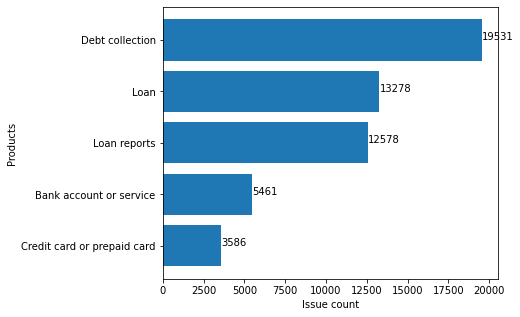

In [130]:
x=list((data.groupby('Product')['Issue'].count().sort_values(ascending=True)).index)
y=list((data.groupby('Product')['Issue'].count().sort_values(ascending=True)).values)
plt.figure(figsize=(6, 5))
plt.barh(x, y)
plt.xlabel('Issue count')
plt.ylabel('Products')
for index, value in enumerate(y):
  plt.text(value, index,str(value))
plt.show()

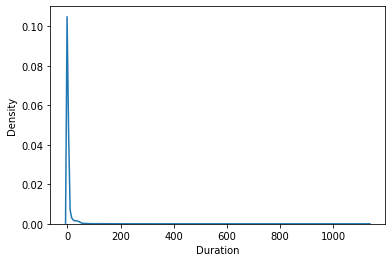

In [131]:
sns.kdeplot(data['Duration'])

In [132]:
data['Duration'].skew()

21.91569253257973

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


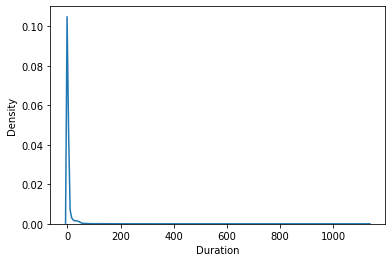

In [133]:
sns.distplot(data['Duration'],hist=False)

In [134]:
sns.set(rc={'figure.figsize':(15,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


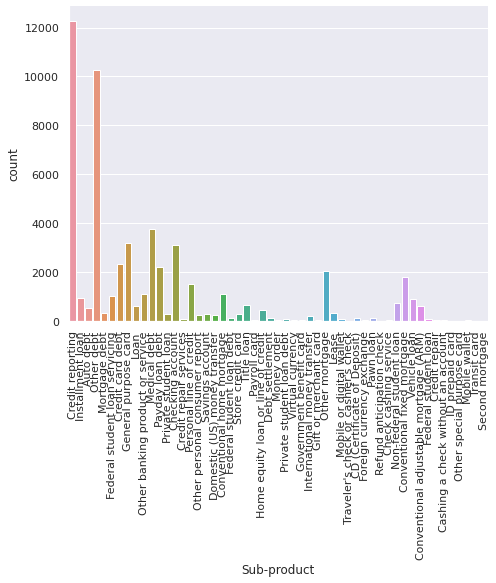

In [135]:
g=sns.factorplot("Sub-product", data=data, aspect=1.5, kind="count")

g.set_xticklabels(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


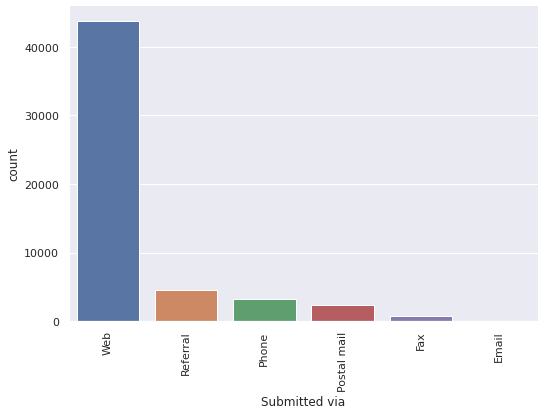

In [136]:
g=sns.factorplot("Submitted via", data=data, aspect=1.5, kind="count")

g.set_xticklabels(rotation=90)

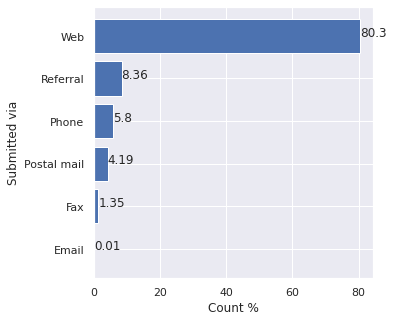

In [137]:
x=list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).index)
y=list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).values)
plt.figure(figsize=(5, 5))
plt.barh(x, y)
plt.xlabel('Count %')
plt.ylabel('Submitted via')
for index, value in enumerate(y):
  plt.text(value, index,str(value))
plt.show()

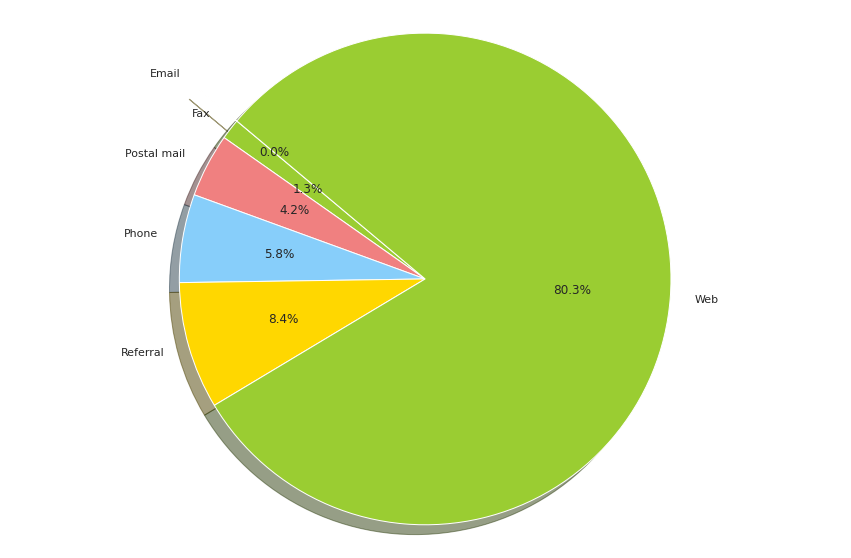

In [138]:
labels = list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).index)
sizes = list(((data['Submitted via'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).values)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140,radius = 0.5)

plt.axis('equal')
plt.show()

In [139]:
data['Company response to consumer'].value_counts()

Closed with explanation            39764
Untimely response                   5707
Closed with non-monetary relief     4693
Closed with monetary relief         2347
Closed                              1697
In progress                          226
Name: Company response to consumer, dtype: int64

In [ ]:
# df["Duration"].plot(kind='box')

In [ ]:
# duration = df['Duration']
# duration.head()

In [ ]:
# q1 = duration.quantile(0.25)
# q3 = duration.quantile(0.75)
# iqr = q3-q1
# ub= q3 + (1.5*iqr)
# lb = q1 -  (1.5*iqr)
# uc = duration.quantile(0.99)
# lc = duration.quantile(0.01)

In [ ]:
# for j in duration.index:
#         if duration[j]>ub:
#             duration[j]=ub
#         elif duration[j]<lb:
#             duration[j]=lb

In [140]:
data['Company response to consumer'].value_counts()

Closed with explanation            39764
Untimely response                   5707
Closed with non-monetary relief     4693
Closed with monetary relief         2347
Closed                              1697
In progress                          226
Name: Company response to consumer, dtype: int64

In [141]:
data['Company response to consumer'].value_counts()

Closed with explanation            39764
Untimely response                   5707
Closed with non-monetary relief     4693
Closed with monetary relief         2347
Closed                              1697
In progress                          226
Name: Company response to consumer, dtype: int64

In [ ]:
# for i in num_data.columns:
#     q1 = num_data[i].quantile(0.25)
#     q3 = num_data[i].quantile(0.75)
#     iqr = q3-q1
#     ub= q3 + (1.5*iqr)
#     lb = q1 -  (1.5*iqr)
#     uc = num_data[i].quantile(0.99)
#     lc = num_data[i].quantile(0.01)
    
#     for j in num_data[i].index:
#         if num_data.loc[j,i]>ub:
#             num_data.loc[j,i]=uc
#         elif num_data.loc[j,i]<lb:
#             num_data.loc[j,i]=lc


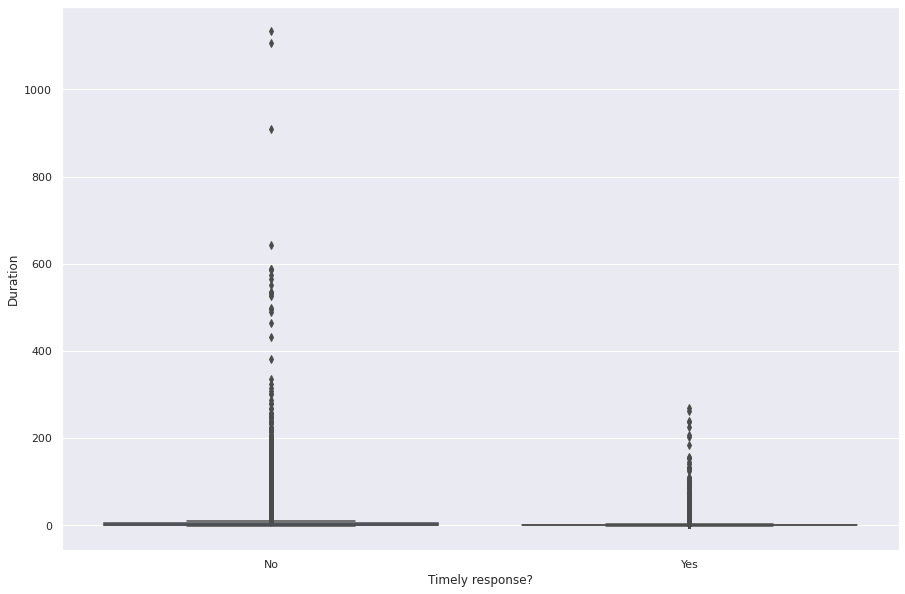

In [143]:
sns.boxplot(x="Timely response?", y="Duration", data=data)

plt.show()

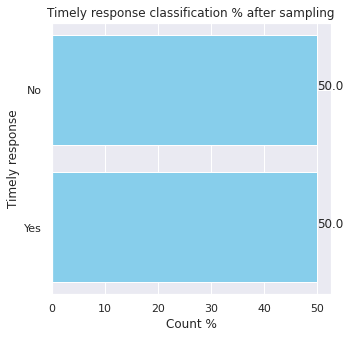

In [144]:
x=list(((data['Timely response?'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).index)
y=list(((data['Timely response?'].value_counts(normalize=True)*100).round(2).sort_values(ascending=True)).values)
plt.figure(figsize=(5, 5))
plt.barh(x, y,color=['#87CEEB'])
plt.title('Timely response classification % after sampling')
plt.xlabel('Count %')
plt.ylabel('Timely response')
for index, value in enumerate(y):
  plt.text(value, index,str(value))
plt.show()

In [ ]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

In [ ]:
fe_imp=important_features.sort_values(by='Importance',ascending=False)

In [ ]:
fe_imp

,Features,Importance
5,Company response to consumer,0.386082
3,Company,0.233415
0,Product,0.200009
1,Sub-product,0.076223
2,Issue,0.034639
7,Duration,0.026044
4,Submitted via,0.021969
6,Regions,0.021620
